## Đồ án cuối kỳ - Lập trình cho Khoa học Dữ liệu

|Danh sách thành viên|MSSV|Phân chia công việc|Tiến độ hoàn thành|
|---|---|---|---|
|Đào Quốc Phong|18120505|||
|Hồ Hoàng Duy|19120207|||

## Thu thập dữ liệu

Dữ liệu trong đồ án lần này là về Phân tích Tính cách của Khách hàng (link [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)). Đây là một phân tích chi tiết về những khách hàng lý tưởng của một công ty. Nó giúp doanh nghiệp hiểu rõ hơn về khách hàng của mình và giúp họ dễ dàng sửa đổi sản phẩm theo nhu cầu, hành vi và mối quan tâm cụ thể của các loại khách hàng khác nhau.

Thông qua việc phân tích tính cách khách hàng giúp doanh nghiệp sửa đổi sản phẩm của mình dựa trên khách hàng mục tiêu từ các loại phân khúc khách hàng khác nhau. Ví dụ: thay vì chi tiền để tiếp thị một sản phẩm mới cho mọi khách hàng trong cơ sở dữ liệu của công ty, một công ty có thể phân tích phân khúc khách hàng nào có nhiều khả năng mua sản phẩm nhất và sau đó chỉ tiếp thị sản phẩm trên phân khúc cụ thể đó.

Data được cung cấp bởi Dr. Omar Romero-Hernandez. 

## Import các thư viện cơ bản

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)

## Khám phá dữ liệu
### Đọc dữ liệu đầu vào

In [3]:
customer_df = pd.read_csv("marketing_campaign.csv", sep="\t")
customer_df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [4]:
customer_df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### Bộ dữ liệu có bao nhiêu hàng và cột?

In [5]:
num_rows, num_cols = customer_df.shape
print('Dữ liệu có {} dòng và {} cột'.format(num_rows, num_cols))

Dữ liệu có 2240 dòng và 29 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là chi tiết thông tin của một khách hàng được thu thập. Có vẻ không có dòng nào có ý nghĩa khác.

### Dữ liệu có dòng nào bị trùng không?

In [6]:
duplicated_rows = customer_df.duplicated()
num_duplicated_rows = len(customer_df[duplicated_rows])
print("Có {} dòng bị lặp.".format(num_duplicated_rows))

Có 0 dòng bị lặp.


### Mỗi cột có ý nghĩa gì?

Dưới đây là mô tả ý nghĩa của các cột trong file `marketing_campaign.csv`:   

*People*

ID: Customer's unique identifier  
Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

*Products*

MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  

*Promotion*

NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

*Place*

NumWebPurchases: Number of purchases made through the company’s website  
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s website in the last month  

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào cần thay đổi kiểu dữ liệu không?

In [7]:
col_dtypes = customer_df.dtypes
col_dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Ta thấy có 3 cột có kiểu dữ liệu là `object` là: `Education`, `Marital_Status`, `Dt_Customer`. Quan sát vài bộ dữ liệu thì ta có thể đoán cột `Education` và `Marital_Status` có kiểu dữ liệu `str` và thuộc dạng categorical, cột `Dt_Customer` có dạng "Ngày tháng năm". Các cột còn lại có dạng numerical

## Tiền xử lý + Phân tích dữ liệu

### Tiền xử lý  
Data có quá nhiều cột và có nhiều cột không cần thiết trong đồ án  
Thực hiện xoá bớt một số cột không dùng đến:

-Recency
-NumDealsPurchases    
-NumWebPurchases      
-NumCatalogPurchases  
-NumStorePurchases    
-NumWebVisitsMonth    
-AcceptedCmp3         
-AcceptedCmp4         
-AcceptedCmp5         
-AcceptedCmp1         
-AcceptedCmp2         
-Complain             
-Z_CostContact        
-Z_Revenue            
-Response             


In [8]:
list1 = ['Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df = customer_df.drop(columns = list1)

print(f'Dữ liệu có {len(df)} dòng và {len(df.columns)} cột')
df.sample(5)

Dữ liệu có 2240 dòng và 14 cột


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
491,22,1976,Graduation,Divorced,46310.0,1,0,03-12-2012,185,2,88,15,5,14
246,2176,1972,Graduation,Married,80134.0,1,0,20-05-2013,1218,16,272,104,0,80
1692,10790,1985,PhD,Married,18169.0,1,0,19-02-2013,9,0,5,0,0,7
978,3308,1952,Graduation,Married,35704.0,1,1,03-01-2014,30,9,12,2,11,30
970,10981,1988,Graduation,Married,84219.0,0,0,02-02-2014,434,137,400,45,137,45


#### Xoá các dòng không có dữ liệu (Nan)

In [9]:
df = df.dropna()
df.shape

(2216, 14)

#### Kiểm tra giá trị cột năm sinh:
Hầu hết các dòng có giá trị từ 1940 trở lên tức là tầm 81 tuổi trở xuống.  
Có một vài dòng có giá trị là nhỏ hơn 1940 vd như 1899 là khoảng hơn 100 tuổi, con số này có vẻ không đúng lắm. Thực hiện xoá tất cả các năm sinh nhỏ hơn 1940.

In [10]:
deleteidx  = df.loc[df['Year_Birth'] < 1940].index
df = df.drop(deleteidx)

#### Kiểm tra cột Education:
Ở cột này có giá trị lạ '2n Cycle'. Theo tìm hiểu trên [Education Degree](https://www.uab.cat/web/study/graduate/uab-master-s-degrees-and-graduate-diplomas/what-are-the-differences-between-a-master-s-degree-and-a-graduate-diploma-1345705451834.html) thì đây là một nhóm bằng, và một trong số đó có bằng Master. Nói cách khác thì nó là bằng sau đại học. Nhóm bằng này chia ra 3 loại là: Master's degrees, Graduate Diplomas (bằng sau đại học), và Specialisation courses. Thường bằng Master phải học nhiều hơn, lâu hơn. 2n Cycle chỉ đại diện cho 2 văn bằng còn lại nên theo thứ tự thì em sẽ sắp Master cao hơn 2n Cycle.  
Ngoài ra dữ liệu không có gì bất thường ở cột này.


In [11]:
df.Education.value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

### Kiểm tra cột Marital_Status:
Có 2 giá trị 'YOLO' và 'Absurd' không phù hợp  
Thay đổi giá trị 'Alone' thành 'Single' cho tương đồng với các dòng khác

In [12]:
deleteidx  = df.loc[df['Marital_Status'] == 'YOLO'].index
df = df.drop(deleteidx)

deleteidx = df.loc[df['Marital_Status'] == 'Absurd'].index
df = df.drop(deleteidx)

aloneidx = df.loc[df['Marital_Status'] == 'Alone'].index

df.loc[aloneidx, 'Marital_Status'] = 'Single'

df.Marital_Status.value_counts()

Married     857
Together    572
Single      473
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

#### Kiểm tra dữ liệu cột Income:
Cột có kiểu dữ liệu numeric, các giá trị trải từ 1730 tới 666666. Gần 90% thu nhập có giá trị từ 20000 tới 85000, đây là khoảng ta tập trung khai thác, những giá trị ngoài khoảng này sẽ được coi là outlier. Tiến hành xoá các dòng outlier.

In [13]:
df.Income.describe()

count      2209.000000
mean      52221.801720
std       25193.001847
min        1730.000000
25%       35196.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [14]:
lowidx = df.loc[df['Income'] <20000].index
df = df.drop(lowidx)

highidx = df.loc[df['Income'] >85000].index
df = df.drop(highidx)

df.Income.describe()

count     1985.000000
mean     52234.516373
std      17765.724053
min      20130.000000
25%      37070.000000
50%      51876.000000
75%      67225.000000
max      84953.000000
Name: Income, dtype: float64

#### Kiểm tra dữ liệu cột Kidhome và Teen home:
Dữ liệu từng cột riêng lẽ không có gì lạ. Nhưng có nhiều cột mà số trẻ vị thành niên trong nhà lại lớn hơn số trẻ trong nhà.  

Theo như quan sát thì có khoảng 5% khách hàng là độc thân, và không có kidhome mà lại có 1 teenhome. Tiến hành xoá những dòng này.  

Gần 30% khách hàng khác có tình trạng hôn nhân là chung sống, đã cưới hoặc đã li hôn; họ không có kidhome nhưng lại có teenhome hoặc có 1 kidhome mà có 2 teenhome. Tiến hành copy dữ liệu ở cột teenhome cho cột kidhome ở những dòng này.

In [15]:
wrongif = (df.Teenhome > df.Kidhome) & (df.Marital_Status == 'Single')
# temp = df[wrongif].Marital_Status == 'Single'
df.loc[wrongif]
df = df.drop(wrongif[wrongif].index)
df.shape

(1882, 14)

In [16]:
wrong_idx = (df.Teenhome > df.Kidhome)

df.loc[wrong_idx, 'Kidhome'] = df.loc[wrong_idx,'Teenhome']

#### Kiểm tra dữ liệu cột Dt_Customer:
Xem thử có khách hàng nào đăng ký trong vòng 2 năm qua (tức khách hàng hoạt động chưa được 2 năm), điều này có thể ảnh hưởng tới số lượng mua của khách hàng ở những cột sau.  
Không có khách hàng nào đăng ký tài khoản thành viên trong 2 năm qua.

In [17]:
temp = pd.to_datetime(df.Dt_Customer)
df.Dt_Customer = temp
df.Dt_Customer.describe()

/tmp/ipykernel_15863/609087162.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.Dt_Customer.describe()


count                    1882
unique                    644
top       2014-12-05 00:00:00
freq                       11
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

#### Kiểm tra dữ liệu các cột hàng hoá MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds  
Dữ liệu không có gì bất thường.

In [18]:
df.dtypes

ID                           int64
Year_Birth                   int64
Education                   object
Marital_Status              object
Income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer         datetime64[ns]
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
dtype: object

## Đưa ra các câu hỏi có ý nghĩa để trả lời

#### Với từng loại sản phẩm sẽ thu hút nhóm người với từng đặc điểm nào?

In [19]:
df.insert(8,'Spent', df.iloc[:,8:].sum(axis = 1))

In [20]:
high_spending = df[df.Spent>800]
avg_spending = df[ (df.Spent>200) & (df.Spent< 800)]
low_spending = df[df.Spent<200]

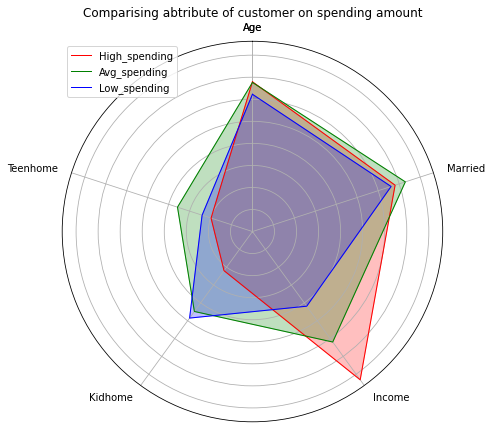

In [77]:
# function draw outline and fill
def add_to_radar(spending_rank, color, label):
  values = []

  age =  2021 - spending_rank.Year_Birth.values
  max_age = 80
  values.append(age.mean()/max_age)

  Live_together_count=  spending_rank.Marital_Status.value_counts()

  values.append((Live_together_count['Married'] + Live_together_count['Together']) / Live_together_count.sum())

  income =  spending_rank.Income.mean()
  max_income = 85000
  values.append(income/max_income)

  kidhome =  spending_rank.Kidhome.mean()
  max_kids = 2
  values.append(kidhome/max_kids)
  
  teenhome =  spending_rank.Teenhome.mean()
  max_teens = 2
  values.append(teenhome / max_teens)

  values += values[:1]

  ax.plot(angles, values, color=color, linewidth=1, label=label)
  ax.fill(angles, values, color=color, alpha=0.25)


# Each attribute we'll plot in the radar chart.
labels = ['Age', 'Married', 'Income', 'Kidhome', 'Teenhome']


# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

# Draw the outline of our data.

add_to_radar(high_spending, 'red', 'High_spending')
add_to_radar(avg_spending, 'green', 'Avg_spending')
add_to_radar(low_spending, 'blue', 'Low_spending')


ax.legend()

# print(angles)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
labels += labels[:1]
ax.set_xticks(angles)
ax.set_xticklabels(labels)


# Hide label
ax.set_yticklabels([])

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_title('Comparising abtribute of customer on spending amount')
plt.show(); 

##### Nhận xét: 
- Những người mua hàng thường xuyên có thu nhập trên trung bình và có từ 1 đến 2 con. 
- Những người mua hàng nhiều thường sẽ không có con và có thu nhập cao hơn trung bình.
- Những người ít mua hàng nhất là nhóm người cú thu nhập thấp và đã có con.

#### Những người có mua hàng thường xuyên, nhiều có xu hướng mua những sản phẩm nào ?

In [78]:
def make_pie_chart(ax, df, name):
    values = df.iloc[:,9:15].mean()
    labels = df.iloc[:,9:15].columns
    ax.pie(values,labels = labels,autopct='%1.2f%%')
    ax.set_title(name)

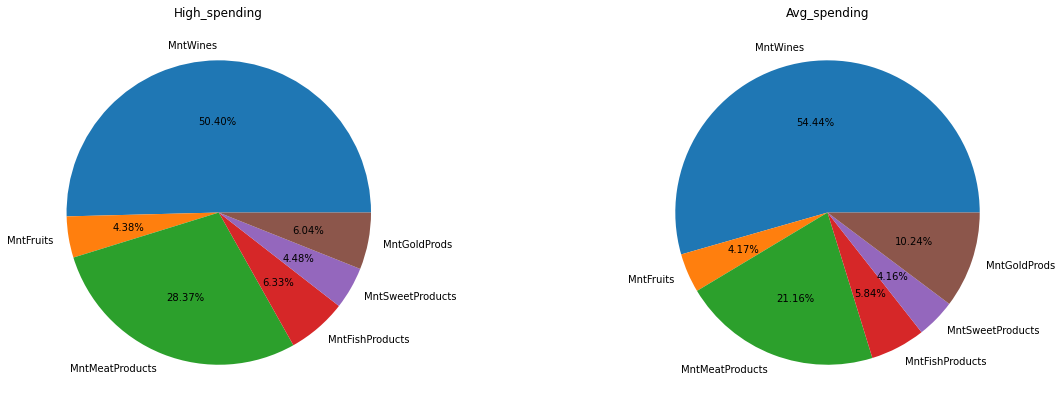

In [79]:
fig, (ax1, ax2) = plt.subplots( 1,2,figsize=(20,7))

make_pie_chart(ax1, high_spending, 'High_spending')
make_pie_chart(ax2, avg_spending, 'Avg_spending')
plt.show();


##### Nhận xét:
- Cả 2 nhóm đều có xu hướng mua rất nhiều rượu (trên 50%), và mua lượng lớn các sản phẩm từ thịt (20-30%).
- Công ty nên tập trung vào rượu và các sản phẩm từ thịt.
- Với thu nhập cao và lượng lớn người mua hàng tiêu thụ rượu, công ty có thể tăng thu nhập bằng cách cho ra các dòng rượu thượng hạng để khai thác từ nhóm người này.

## Nhìn lại quá trình làm đồ án

## Tài liệu tham khảo
reference: https://www.pythoncharts.com/matplotlib/radar-charts/